## Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

## Import data and make DataFrame

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
pd.set_option('display.max_columns', None)

In [5]:

df_test.drop(columns='id' , inplace=True)
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


## Data Preprossesing

In [6]:
if df_train.columns[:-1].tolist() == df_test.columns.tolist():
    print("The order of DataFrames are the same.")
    
else:
    print("The order of DataFrames are not the same.")

The order of DataFrames are the same.


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
df_test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

## FEATURE SELECTION

In [11]:
correlations = df_train.corrwith(df_train['price_range'])

sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
dtype: float64

 ## Data visualization

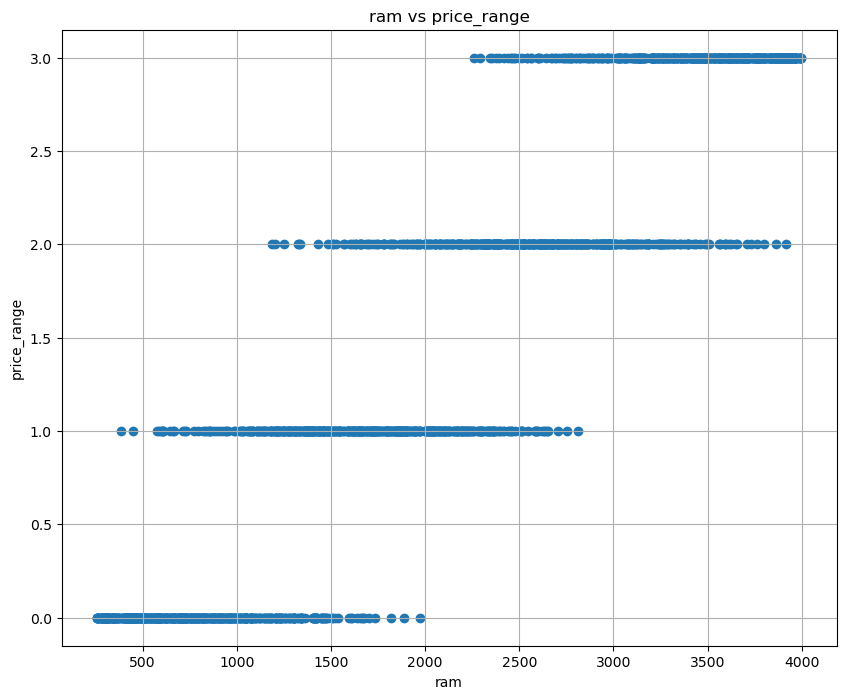

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(df_train['ram'] , df_train['price_range'])
plt.title('ram vs price_range')
plt.xlabel('ram')
plt.ylabel('price_range')
plt.grid()
plt.show()

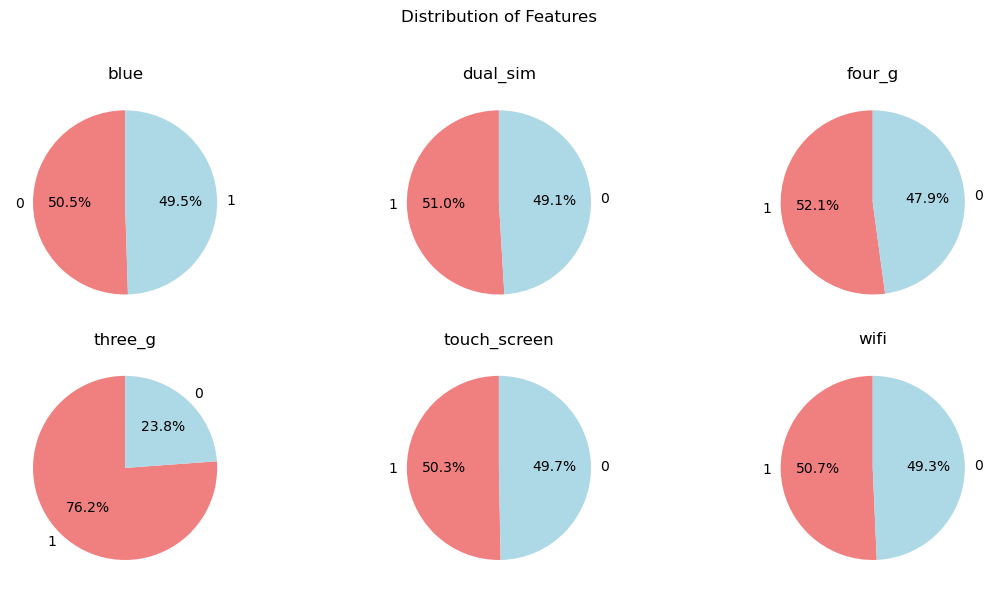

In [13]:
columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']




fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Distribution of Features')



for i, column in enumerate(df_train[columns].columns):
    row, col = divmod(i, 3)
    values = df_train[columns][column].value_counts().values
    labels = df_train[columns][column].value_counts().index
    axes[row, col].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
    axes[row, col].set_title(column)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Normalize

In [14]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
norm = scaler.fit_transform(df_train)
column_names = df_train.columns.tolist()
df_n = pd.DataFrame(norm , columns=column_names)
df_n

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0.333333
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,0.666667
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,0.666667
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0.666667
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,0.000000
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,0.666667
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,1.000000
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,0.000000


## Modeling

In [17]:
df_n.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [19]:
x = df_n.drop(columns='price_range')
y = df_train.price_range.values.reshape(-1,1)

In [20]:
df_evaluation = pd.DataFrame()
test_size = list(np.arange(0.1, 0.2, 0.05))
n_estimators = range(50 , 150 , 50)
max_depth = list(range(2 , 13))

for ns in n_estimators :
    for ts in test_size:
        for md in max_depth:
            
            x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= ts , random_state=40)   
            RF_clf = RandomForestClassifier(n_estimators=ns , max_depth=md , random_state=40 , n_jobs = -1)
            RF_clf.fit(x_train,y_train.ravel())
            y_pred = RF_clf.predict(x_test)
                
            dictionary = { 'n_estimators' : ns , 'test_size' : ts , 'max_depth' : md ,
                            'accuracy' : metrics.accuracy_score(y_test,y_pred) }
            
            df_evaluation = pd.concat([df_evaluation , pd.DataFrame([dictionary])] , ignore_index=True)    

In [21]:
def highlighter(s) :
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df_evaluation.style.apply(highlighter)

,n_estimators,test_size,max_depth,accuracy
0,50,0.100000,2,0.680000
1,50,0.100000,3,0.770000
2,50,0.100000,4,0.805000
3,50,0.100000,5,0.815000
4,50,0.100000,6,0.815000
5,50,0.100000,7,0.865000
6,50,0.100000,8,0.865000
7,50,0.100000,9,0.870000
8,50,0.100000,10,0.880000
9,50,0.100000,11,0.860000


In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.15 , random_state = 40)
RF_clf = RandomForestClassifier(n_estimators = 100 , max_depth = 11 , random_state = 40 , n_jobs = -1)
RF_clf.fit(x_train,y_train.ravel())
y_pred = RF_clf.predict(x_test)

print('accuracy :' , metrics.accuracy_score(y_test , y_pred))

accuracy : 0.92


In [23]:
K_Fold = KFold(10)
print(cross_val_score(RF_clf , x , y.ravel() , cv=K_Fold , n_jobs=1))

[0.885 0.89  0.9   0.87  0.905 0.9   0.91  0.855 0.865 0.865]


## Evaluation

In [24]:
metrics.confusion_matrix(y , RF_clf.predict(x))

array([[496,   4,   0,   0],
       [  4, 489,   7,   0],
       [  0,   4, 494,   2],
       [  0,   0,   3, 497]], dtype=int64)

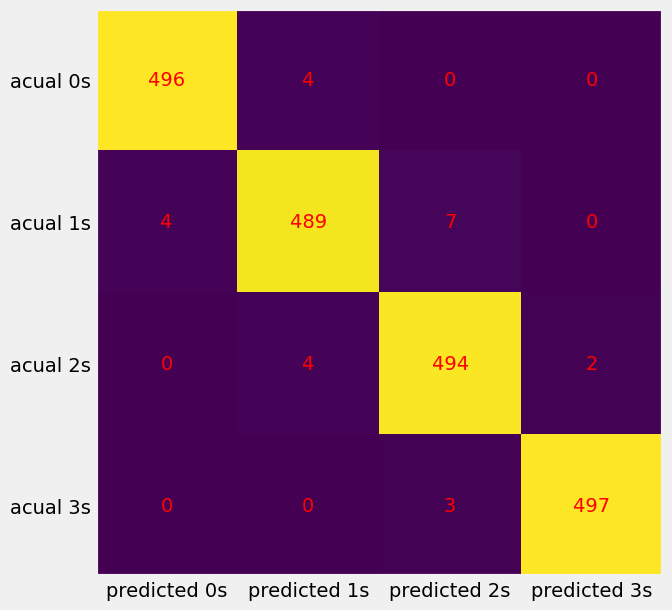

In [25]:
cm = metrics.confusion_matrix(y, RF_clf.predict(x))

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('predicted 0s', 'predicted 1s', 'predicted 2s', 'predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('acual 0s', 'acual 1s', 'acual 2s', 'acual 3s'))
ax.set_ylim(3.5, -0.5)


for i in range(4):
    for j in range(4):
        ax.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='red')

plt.show()

In [26]:
print(metrics.classification_report(y,RF_clf.predict(x)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.98      0.98      0.98       500
           2       0.98      0.99      0.98       500
           3       1.00      0.99      0.99       500

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

